<a href="https://colab.research.google.com/github/NirranjanOfficial/grinding-lab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch workflow:
###Steps involved:
1. Data prepare and Load
2. Build model (includes selecing optimiser and the loop)
3. Fitting the model to the data(training)
4. Making predicting and evaluating a model(inference)
5. Saving and loading
6. Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt #we need to continuously visvalise
torch.__version__

'2.6.0+cu124'

###Data prepare and Load:
Data can be almost anything... in machine learning.
* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text
Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

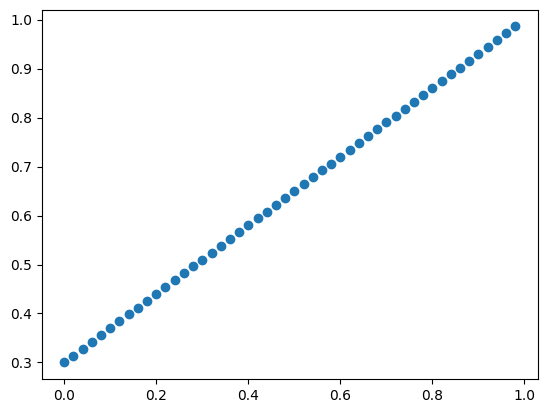

In [ ]:
#Lets simply start with linear regression!
weight = 0.7  #how much importance should i give tothat specific neural line
bais = 0.3  #error estimate

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bais
X[:10], y[:10]
len(X),len(y)
X.shape
'''#What we are doing here is that...we know there is a relationship between X n y
...but we need our model to find it out!'''
plt.scatter(X,y)
plt.show()

In [ ]:
#Before that we need to split our Data into validation set and test set

In [ ]:
train_split = int(0.8 * len(X))   #80% of the actual data is used to train model
X_train, y_train = X[:train_split], y[:train_split] #selecting from 0th data to 80th data
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test) #see the data is split into 2!

(40, 40, 10, 10)

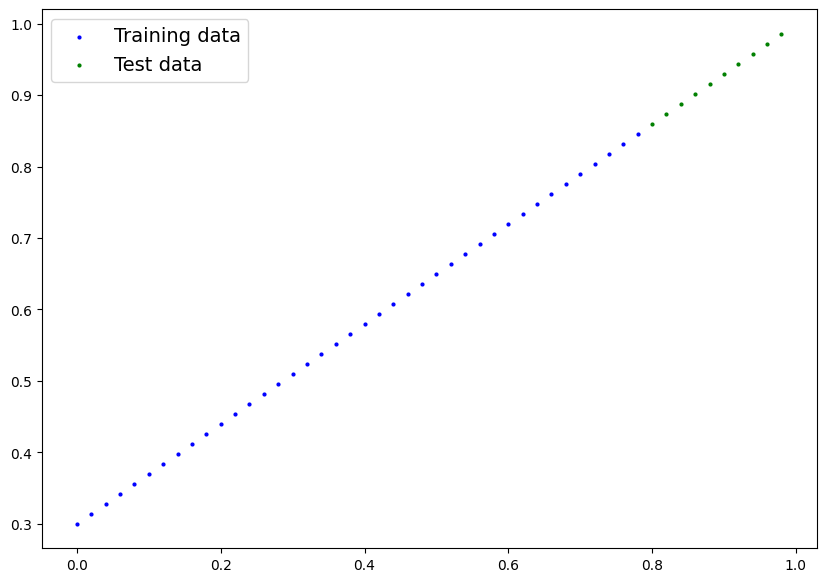

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predections=None):
  plt.figure(figsize=(10,7))
  #lets plot our training data in one color and test data in another color
  plt.scatter(train_data, train_labels,c='b',s=4,label="Training data")
  plt.scatter(test_data, test_labels,c='g',s=4,label="Test data")
  if predections is not None: #ie if there is any predection...plot it in red color
    plt.scatter(test_data, predections,c='r',s=4,label="Predictions")
  plt.legend(prop={"size":14})
  plt.show()

plot_predictions()

###Building the first Pytorch model for liner regression model:
What our model does:

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used
to create the data)

How it does?
* Gradient decent
* Backprobagation

###Essentials:
* torch.nn contains all of the buildings for computational graphs
(a neural network can be considered a computational graph)
* torch.nn. Parameter - what parameters should our model try and
learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules,
if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will
help with gradient descent
* def forward() - All nn. Module subclasses require you to overwrite
forward(), this method defines what happens in the forward
computation

In [ ]:
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) ->torch.Tensor:
    return self.weight * x + self.bias #linear regression formula..y=mX+c

#It is important to have an forward function as it is what tells the model
#like what kind of thing it should do and send to next set of neorons!

In [ ]:
#Create random seed
torch.manual_seed(42)  #used to get the same value again n again
model_0 = LinearRegressionModel()  #Instance is created here
list(model_0.parameters())  #we are checking out the partameters in the model!

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()  #this is used

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bais, X_test, y_test

(0.7,
 0.3,
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

###Making prediction using torch.inference_mode ( )
To check our model's predictive power, let's see how well it predicts y_test based on ✗_test.

When we pass data through our model, it's going to run it through the forward () method.

In [ ]:
with torch.inference_mode():# it removes unwanted tracking during processes!
  y_preds =model_0(X_test)
#we can also use torch.no_grad(), however it is prefered to use inference!
#y_preds == y_test

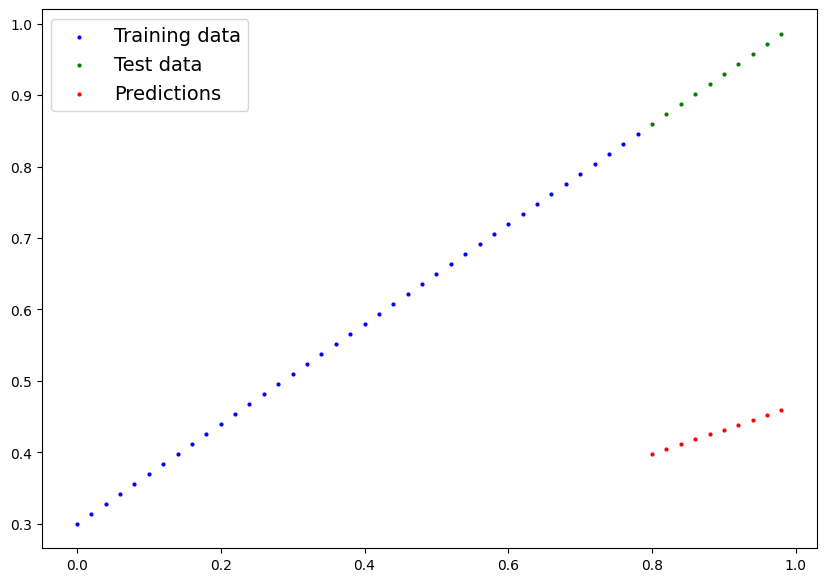

In [ ]:
plot_predictions(predections=y_preds)
#When we plot this we will be getting lines off chart..because we have only assigned random values right now
#as we know...model takes in random value and updates it!

###Training phase:
Until now the model is having some ref data and some random predicted data....now its time to understand the difference and train it to get good output.

Poor representation -> good representation

We can measure how much worng our model it by usin loss function!
* We basically need 2 main function to train our model:
  1.  **Loss fuction** (Finds the loss between our values)
  2.  **Optimizer** (Adjusts the parmeter value)


 * For pytorch we also need 2 more things to train an model:
  1. A training loop
  2.A testing loop

**NOTE:** we can find the parameters current values using model_0.state_dict()

In [ ]:
#Setup an LossFunction:
loss_fn = nn.L1Loss()

#Setup an Optimiser:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)  #Stocastc Gradient Decent
#It takes the parameters from the model then it will adjust the loss
#lr => is the learning rate ie alpha..hyperparameter..ie we set it manually
#Larger the learning rate larger the parameter

**Which loss function and optimizer should I use?**

 This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular
problem set.
For example, for a regression problem (like ours), a loss function of nn.L1Loss ( ) and an optimizer like torch.optim. SGD () will
suffice.
But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of
nn. BCELOSS() (binary cross entropy loss).

###Steps involved in building an training loop:
A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward ()`
functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of
each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and
improve the loss (**gradient descent**)

#*THE BLEOW IS IMP LOOP FUNC:*

In [ ]:
#epochs is one loop through the data..this is a hyperparameter because we've set it ourselves
epochs = 100
#loop thorugh the sata
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() #Trianing mode in Pytroch need all the parameter to do gradient

  #1)forward pass
  y_preds = model_0(X_train)

  #2)Loss function
  loss = loss_fn(y_preds,y_train)  # we need to : input first , targets next
  if epoch%10 ==0:
    print(f"losss:{loss}")
  #3)Optimizer:
  optimizer.zero_grad()

  #4)Backprobagation to update the values:
  loss.backward()

  #5)To perform gradient decent
  optimizer.step()

###Testing
# ✅ Training loop
for epoch in range(epochs):
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Optional: show progress every 10 epochs
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss}")

# ✅ After training ends: do testing
model_0.eval()  # Set to eval mode once
if epoch%10 ==0:
  print("Final model weights:")
  print(model_0.state_dict())

with torch.inference_mode():  # no gradients here
    test_preds = model_0(X_test)  #Forward pass
    test_loss = loss_fn(test_preds, y_test) #Loss function
    print(f"Test Loss: {test_loss}")



losss:0.31288138031959534
losss:0.3013603389263153
losss:0.28983938694000244
losss:0.2783183455467224
losss:0.26679736375808716
losss:0.2552763819694519
losss:0.24375538527965546
losss:0.232234388589859
losss:0.22071340680122375
losss:0.2091923952102661
Epoch 0 | Loss: 0.19767141342163086
Epoch 10 | Loss: 0.18615040183067322
Epoch 20 | Loss: 0.17462942004203796
Epoch 30 | Loss: 0.16310855746269226
Epoch 40 | Loss: 0.15158770978450775
Epoch 50 | Loss: 0.14006686210632324
Epoch 60 | Loss: 0.12854602932929993
Epoch 70 | Loss: 0.11702518165111542
Epoch 80 | Loss: 0.10654274374246597
Epoch 90 | Loss: 0.09747617691755295
Test Loss: 0.22904661297798157


In [ ]:
#The weight i assigned we near 0.7 and bias was 0.8...the accquired tensor was close to it!
#forward pass -> loss func -> zero grad -> backproab -> optimizer

###Testing:

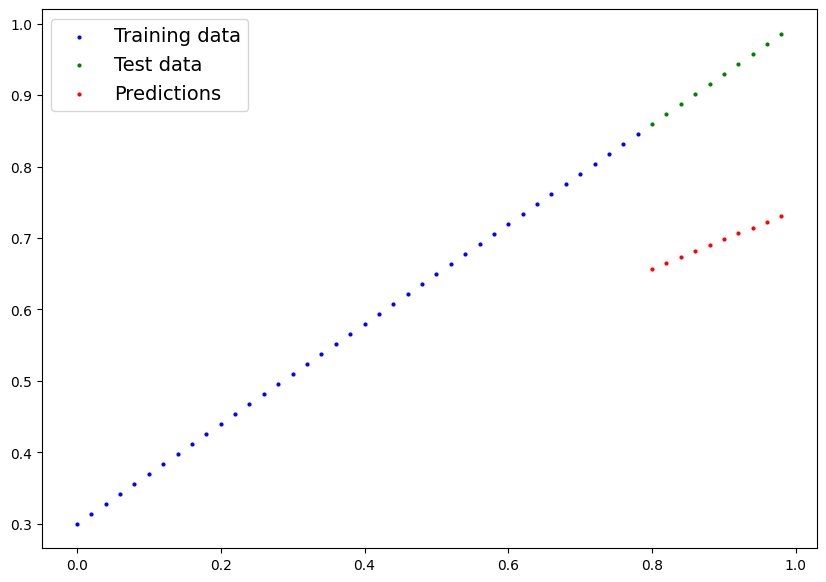

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  plot_predictions(predections=y_preds_new)

Vetttrriiiiiii!!!!!!!!!

**Some code below is removed and also some are present with certain level of Bug! Needed to be fixed!**

In [ ]:
#Plot the loss curves
plt.plot(epoch_count, np.array (torch. tensor (loss_values). numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(); I

NameError: name 'epoch_count' is not defined